# 0511 11pm 시작

In [1]:
import pandas as pd

사용할 data

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,C,"Fernandez, CB; Hui, P",NaN,NaN,IEEE Comp Soc,"Fernandez, Carlos Bermejo; Hui, Pan",NaN,NaN,"Life, the Metaverse and Everything: An Overvie...",2022 IEEE 42ND INTERNATIONAL CONFERENCE ON DIS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000895984800049,View Full Record in Web of Science
1,C,"Wang, YY; Siau, KL; Wang, L",NaN,"Chen, JYC; Fragomeni, G; Degen, H; Ntoa, S",NaN,"Wang, Yuying; Siau, Keng L.; Wang, Le",NaN,NaN,Metaverse and Human-Computer Interaction: A Te...,HCI INTERNATIONAL 2022 - LATE BREAKING PAPERS:...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000906729200016,View Full Record in Web of Science
2,J,"Dolata, M; Schwabe, G",NaN,NaN,NaN,"Dolata, Mateusz; Schwabe, Gerhard",NaN,NaN,What is the Metaverse and who seeks to define ...,JOURNAL OF INFORMATION TECHNOLOGY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000945833900001,View Full Record in Web of Science
3,C,"Hu, YH; Chen, H",NaN,"Duffy, VG; Rau, PP",NaN,"Hu, Yuehui; Chen, Hong",NaN,NaN,The Trend of Industrial Design from the Perspe...,HCI INTERNATIONAL 2022 - LATE BREAKING PAPERS:...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000937041100026,View Full Record in Web of Science
4,J,"Bansal, G; Rajgopal, K; Chamola, V; Xiong, ZH;...",NaN,NaN,NaN,"Bansal, Gaurang; Rajgopal, Karthik; Chamola, V...",NaN,NaN,Healthcare in Metaverse: A Survey on Current M...,IEEE ACCESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000886923800001,View Full Record in Web of Science
5,J,"Zainab, HE; Bawany, NZ; Imran, J; Rehman, W",NaN,NaN,NaN,"Zainab, Hijab E.; Bawany, Narmeen Zakaria; Imr...",NaN,NaN,Virtual Dimension-A Primer to Metaverse,IT PROFESSIONAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000917257500007,View Full Record in Web of Science
6,J,"Wang, MJ; Yu, HY; Bell, Z; Chu, XY",NaN,NaN,NaN,"Wang, Minjuan; Yu, Haiyang; Bell, Zerla; Chu, ...",NaN,NaN,Constructing an Edu-Metaverse Ecosystem: A New...,IEEE TRANSACTIONS ON LEARNING TECHNOLOGIES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000911279300004,View Full Record in Web of Science
7,J,"Venugopal, JP; Subramanian, AAV; Peatchimuthu, J",NaN,NaN,NaN,"Venugopal, Jothi Prakash; Subramanian, Arul An...",NaN,NaN,The realm of metaverse: A survey,COMPUTER ANIMATION AND VIRTUAL WORLDS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000941930600001,View Full Record in Web of Science
8,C,"Wang, YY; Lee, LH; Braud, T; Hui, P",NaN,NaN,IEEE Comp Soc,"Wang, Yuyang; Lee, Lik-Hang; Braud, Tristan; H...",NaN,NaN,Re-shaping Post-COVID-19 Teaching and Learning...,2022 IEEE 42ND INTERNATIONAL CONFERENCE ON DIS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000895984800044,View Full Record in Web of Science
9,C,"Guan, J; Irizawa, J; Morris, A",NaN,NaN,IEEE Comp Soc,"Guan, Jie; Irizawa, Jay; Morris, Alexis",NaN,NaN,Extended Reality and Internet of Things for Hy...,2022 IEEE CONFERENCE ON VIRTUAL REALITY AND 3D...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOS:000808111800034,View Full Record in Web of Science


Abstract 열만 추출 -> udata

In [4]:
udata = data['Abstract']
udata

0     The meta verse is expected to be the next majo...
1     Metaverse is posed to change the world and rev...
2     The Metaverse has become a buzz-phrase among t...
3     With the rapid development of the Internet, th...
4     The COVID-19 pandemic has revealed several lim...
5     The metaverse is a concept of a persistent, on...
6     The Metaverse is a network of 3-D virtual worl...
7     The next step of digital development is the me...
8     During the COVID-19 pandemic, most countries h...
9     The Metaverse encompasses technologies related...
10    Metaverse, with the combination of the prefix ...
11    Metaverse has grasped the news headlines recen...
12    As the latest and most popular concept in the ...
13    The recent Facebook rebranding to Meta has dra...
14                                                  NaN
15    We developed Wander[001] as an experiment to d...
16    With the rapid development and evolution of im...
17    In this study, we design an interface opti

In [5]:
udata.dropna() # 결측치 14행 제거

0     The meta verse is expected to be the next majo...
1     Metaverse is posed to change the world and rev...
2     The Metaverse has become a buzz-phrase among t...
3     With the rapid development of the Internet, th...
4     The COVID-19 pandemic has revealed several lim...
5     The metaverse is a concept of a persistent, on...
6     The Metaverse is a network of 3-D virtual worl...
7     The next step of digital development is the me...
8     During the COVID-19 pandemic, most countries h...
9     The Metaverse encompasses technologies related...
10    Metaverse, with the combination of the prefix ...
11    Metaverse has grasped the news headlines recen...
12    As the latest and most popular concept in the ...
13    The recent Facebook rebranding to Meta has dra...
15    We developed Wander[001] as an experiment to d...
16    With the rapid development and evolution of im...
17    In this study, we design an interface optimize...
18    Digital Twin (DT) models mirror the life o

# 1차 시도 - 0512

In [6]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel

# 엑셀 파일에서 데이터 읽어오기
df = pd.read_excel('data.xlsx')
texts = df['Abstract'].dropna().tolist()

# 각 문서를 단어 리스트로 변환
texts = [[word for word in str(text).split()] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics = 20)

# 결과 출력
for topic in lda_model.print_topics():
    print(topic)

(0, '0.007*"and" + 0.004*"of" + 0.004*"the" + 0.002*"a" + 0.002*"The" + 0.002*"to" + 0.002*"Metaverse" + 0.002*"in" + 0.002*"on" + 0.002*"with"')
(1, '0.017*"and" + 0.011*"the" + 0.008*"of" + 0.006*"a" + 0.004*"we" + 0.004*"on" + 0.004*"Metaverse" + 0.004*"The" + 0.004*"information" + 0.003*"in"')
(2, '0.049*"the" + 0.027*"and" + 0.021*"to" + 0.021*"of" + 0.019*"in" + 0.014*"a" + 0.009*"for" + 0.007*"on" + 0.007*"metaverse" + 0.006*"We"')
(3, '0.038*"the" + 0.028*"and" + 0.023*"of" + 0.018*"to" + 0.014*"a" + 0.011*"in" + 0.009*"that" + 0.007*"The" + 0.007*"for" + 0.006*"xR"')
(4, '0.001*"architecture," + 0.001*"avatarization" + 0.001*"actuators." + 0.001*"adaptive" + 0.001*"advances" + 0.001*"anchor" + 0.001*"XRI" + 0.001*"avatar" + 0.001*"contributes:" + 0.001*"concepts,"')
(5, '0.020*"and" + 0.016*"of" + 0.014*"the" + 0.008*"a" + 0.007*"with" + 0.006*"that" + 0.006*"learners\'" + 0.004*"in" + 0.004*"from" + 0.004*"had"')
(6, '0.006*"in" + 0.005*"and" + 0.004*"the" + 0.004*"that" + 0.

- 위 코드에서는 엑셀 파일을 Pandas 라이브러리를 이용해 읽어온 후, 텍스트 데이터를 단어 리스트로 변환합니다. 
- 그리고 이를 바탕으로 사전(dictionary)과 문서-단어 행렬(corpus)을 생성한 후, 
- Gensim의 LdaModel을 이용해 LDA 토픽 모델링을 진행합니다. 
- 마지막으로 모델의 결과를 출력합니다.
   
- 위 코드에서 num_topics 매개변수는 생성할 토픽의 수를 의미합니다. 이 값을 조정하여 원하는 토픽의 수를 생성할 수 있습니다. 
- 또한, print_topics() 함수는 각 토픽의 단어와 가중치를 출력합니다. 이를 통해 생성된 토픽들의 내용을 파악할 수 있습니다.

## 한국어 불용어 제거

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jwoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jwoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "NTLK는 한국어 불용어 데이터를 제공하지 않습니다. 왜냐하면 토큰화 단계에서 필요없는 조사, 접속사를 제거하면 되기 때문입니다."
stop_words = "않습니다 왜냐하면 되기"

word_tokens = word_tokenize(example)
stop_words=stop_words.split(' ')

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

print(word_tokens,'\n') 
print(result)

['NTLK는', '한국어', '불용어', '데이터를', '제공하지', '않습니다', '.', '왜냐하면', '토큰화', '단계에서', '필요없는', '조사', ',', '접속사를', '제거하면', '되기', '때문입니다', '.'] 

['NTLK는', '한국어', '불용어', '데이터를', '제공하지', '.', '토큰화', '단계에서', '필요없는', '조사', ',', '접속사를', '제거하면', '때문입니다', '.']


- 한국어에서 불용어를 제거하는 방법으로는 간단하게는 토큰화 후에 조사, 접속사 등을 제거하는 방법이 있습니다. 
- 하지만 불용어를 제거하려고 하다보면 조사나 접속사와 같은 단어들뿐만 아니라 명사, 형용사와 같은 단어들 중에서 불용어로서 제거하고 싶은 단어들이 생기기도 합니다. 
- 결국에는 사용자가 직접 불용어 사전을 만들게 되는 경우가 많습니다. 
- 이번에는 직접 불용어를 정의해보고, 주어진 문장으로부터 사용자가 정의한 불용어 사전으로부터 불용어를 제거해보겠습니다.

# 불필요한 단어 제거(한국어)
with open('stopwords-ko.txt', encoding='utf-8') as f:   
    stopwords = f.readlines()   
stopwords = [x.strip() for x in stopwords]   
okt = Okt()   
texts = [okt.morphs(text) for text in texts]   
texts = [[word for word in text if word not in stopwords] for text in texts]   

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jwoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# 2차 시도

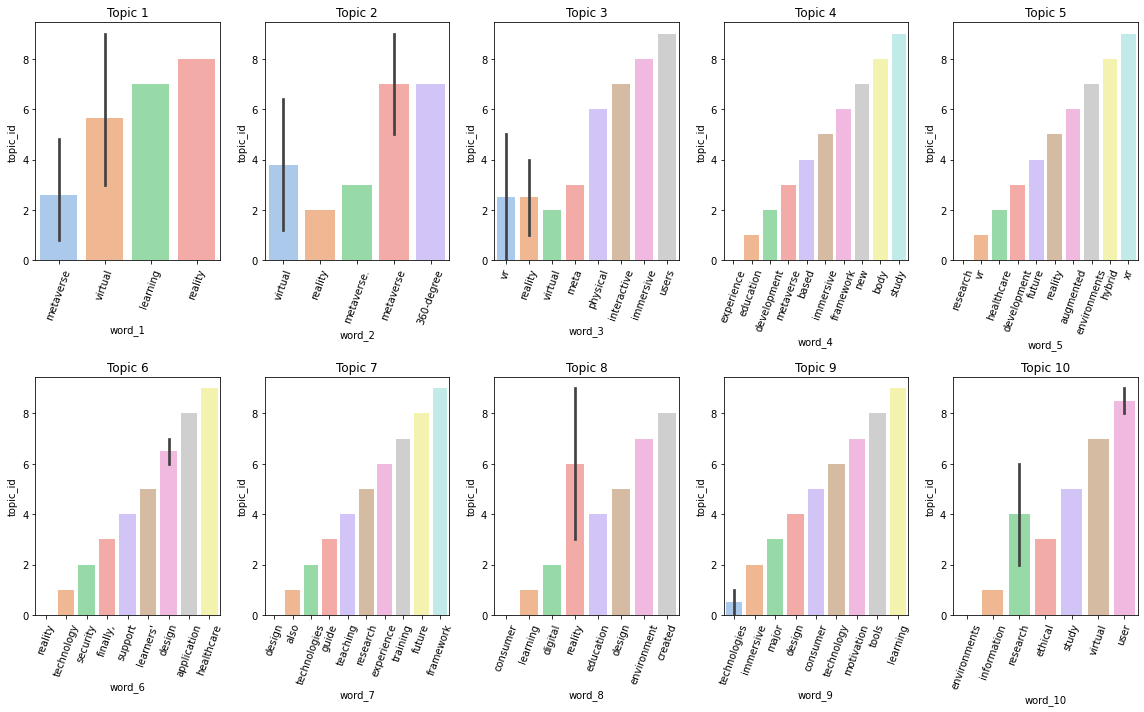

In [22]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import defaultdict
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# 엑셀 파일에서 데이터 읽어오기
df = pd.read_excel('data.xlsx')
texts = df['Abstract'].dropna().tolist() # 14행에 결측치 있어서 제거 후 리스트 변환

# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 사전(dictionary) 구축
dictionary = corpora.Dictionary(texts)

# 문서-단어 행렬(corpus) 생성
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# 토픽 별 상위 단어 추출
topic_word = []
for i, topic in lda_model.show_topics(formatted=False, num_words=10):
    topic_word.append([i] + [word[0] for word in topic])
    
# 데이터프레임으로 변환
topic_word_df = pd.DataFrame(topic_word, columns=['topic_id', 'word_1', 'word_2', 'word_3', 'word_4', 'word_5', 'word_6', 'word_7', 'word_8', 'word_9', 'word_10'])


# 1) 토픽별 단어 빈도 그래프 생성
plt.figure(figsize = (16,10))
for i in range(1, lda_model.num_topics + 1):
    plt.subplot(2, 5, i)
    sns.barplot(x = 'word_' + str(i), y = 'topic_id', data = topic_word_df, palette = 'pastel')
    plt.title('Topic ' + str(i))
    plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

- LDA 토픽 모델링을 통해 생성된 토픽별 단어 빈도에 대한 표와 그래프를 생성하는 코드입니다. 
- 또한, 토픽 모델링을 위해 불필요한 단어를 제거하는 코드도 포함되어 있습니다.
   
- LDA 모델에서 토픽 개수 10개로 지정
- This means that the LDA model will try to identify 10 topics in the input text data. You can adjust this parameter to change the number of topics you want to identify. For example, if you want to identify 5 topics, you can set num_topics=5.

- Choosing the optimal number of topics for LDA is a challenging problem and depends on the characteristics of your data and your research goals. There are several techniques available to estimate the optimal number of topics, such as coherence scores, topic coherence, and perplexity. You may want to experiment with different values of num_topics and evaluate the quality of the resulting topics using one of these techniques.

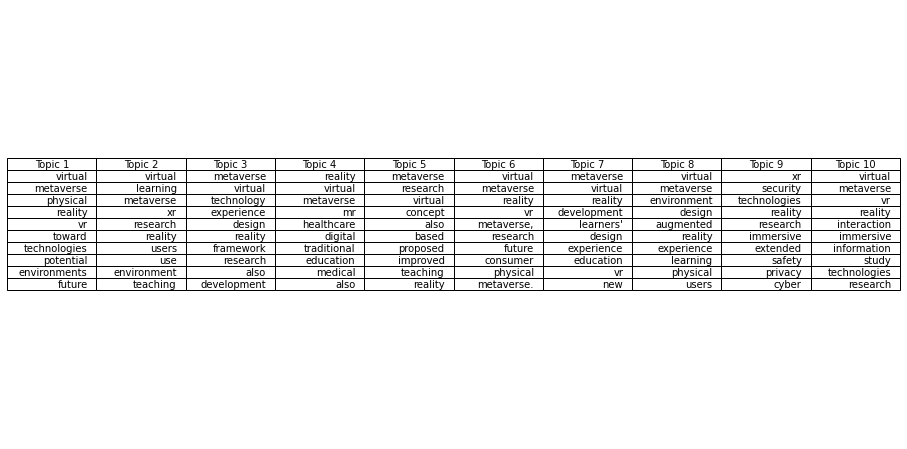

In [12]:
# 2) 토픽별 단어 빈도 표 생성

# Get the top 10 words for each topic
topics = lda_model.show_topics(num_topics = 10, num_words = 10, formatted = False)

# Create a dataframe to store the top words for each topic
df = pd.DataFrame()

# Iterate over the topics and add the top words to the dataframe
for topic in topics:
    topic_num = topic[0]
    words = [word[0] for word in topic[1]]
    df['Topic {}'.format(topic_num + 1)] = words

# Create a table using matplotlib
fig, ax = plt.subplots(figsize = (16,8))
ax.axis('off')
ax.table(cellText = df.values, colLabels = df.columns, loc = 'center')
plt.show()

In [13]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

- pyLDAvis.gensim_models 라이브러리를 이용하면 LDA 모델링 결과를 시각화할 수 있는 인터랙티브한 그래프를 생성할 수 있습니다. 

1. 우측 상단 sliding bar를 통해 Relevance를 조절할 수 있습니다. 
- Relevance는 특정 토픽에서 어떤 단어의 출현 빈도와 전체 문서에서 그 단어의 출현 빈도를 균형 있게 조정하는 하이퍼 파라미터입니다. 
- 즉, 특정 토픽에서 출현 빈도가 높게 나타난 어떤 단어가 있을 때, 그 단어가 다른 토픽과 해당 토픽을 구분하는 키워드이기 때문에 출현 빈도가 높은 것인지, 아니면 단순히 여러 문서 데이터에서 널리 사용되는 단어이기 때문에 출현 빈도가 높았던 것인지 명확히 구분할 수 있도록 도와주는 파라미터입니다.

2. Relevance 값은 0부터 1 사이의 값으로, 0에 가까울수록 전체 문서에서 출현 횟수는 적더라도 해당 토픽을 다른 토픽과 차별성 있게 구분할 수 있는 단어인지에 집중합니다. 
- 반대로, Relevance 값이 1에 가까울수록 특정 토픽을 구성하는 키워드보다는 전체 문서 데이터에서 얼마나 빈출 되는 키워드일 가능성이 높다는 의미입니다. 
- 예를 들어, 건강관리 앱 리뷰 데이터에서는 '운동'이라는 단어가 여러 리뷰에서 등장할 확률이 굉장히 높습니다. 따라서 단순히 '운동'이라는 단어만으로는 어떤 토픽을 다른 토픽과 명확하게 구분짓기는 어렵습니다.    
- 이러한 경우에 Relevance를 0에 가깝게 설정하면 많은 리뷰에서 빈출되는 '운동'이라는 단어의 중요도(importance)에 페널티를 부여할 수 있습니다.
- 이를 통해 '운동'이라는 단어는 해당 토픽에만 유독 많이 등장한 것이 아닌 전체 문서에서 널리 사용되는 단어임을 파악할 수 있습니다. 
- Sievert & Shirley (2014) 연구에 따르면, Relevance 값은 0.6이 가장 효과적인 것으로 알려져 있습니다. 하지만, 이 값은 항상 정답이 아닙니다. 각자의 연구 도메인, 데이터셋 등에 따라 최적의 Relevance 값은 다를 수 있기 때문입니다.

3. 좌측 원이 모두 각각의 토픽입니다. 
- 원과 원 사이의 거리는 서로 얼마나 유사한 토픽인지를 의미합니다. 
- 즉, 서로 가까이 붙어있는 원일 수록 유사한 토픽입니다. 원이 클수록 토픽에 해당되는 단어(=토큰)의 개수가 많다는 것을 의미합니다. 
- 원에 마우스를 가져다 대면 우측에 해당 토픽을 구성하는 단어가 전체 문서 데이터 대비 현재 토픽의 키워드로 구성되었는지 비율을 알려줍니다. 또한, 전체 문서 데이터의 단어 대비 해당 토픽이 구성하는 단어들의 비율을 제공합니다. 
- 이처럼 토픽별로 어떤 단어들이, 어떤 비율로 구성되어 있는지 파악함으로써 토픽별 주제를 유추할 수 있으며, 나아가 전체 문서 데이터에 어떤 토픽이, 어떤 비율로(=중요도) 구성되어 있는지 파악할 수 있습니다.

In [15]:
# LDA 모델 생성
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# 각 토픽에서 가장 많이 등장한 상위 3개의 단어 추출
top_n = 3
topic_words = {}
for i in range(lda_model.num_topics):
    topic_words[i] = [word for word, _ in lda_model.show_topic(i, topn=top_n)]

# 주요 토픽 추출
major_topic = {}
for i, text in enumerate(texts):
    topic_scores = sorted(lda_model[corpus[i]], key=lambda x: -x[1])
    major_topic[i] = topic_scores[0][0]  # 가장 높은 점수를 받은 토픽 번호
    
for topic, words in topic_words.items():
    count = 0
    for i, t in major_topic.items():
        if t == topic and set(words) & set(texts[i]):
            count += 1
    print(f"Topic {topic}: {count}")


Topic 0: 5
Topic 1: 1
Topic 2: 3
Topic 3: 6
Topic 4: 5
Topic 5: 4
Topic 6: 2
Topic 7: 2
Topic 8: 1
Topic 9: 2


- 위 코드에서는 각 토픽에서 상위 3개의 단어를 추출하고, 이를 topic_words라는 딕셔너리에 저장합니다. 그리고 각 문서에서 가장 높은 점수를 받은 토픽 번호를 major_topic이라는 딕셔너리에 저장합니다. 마지막으로, major_topic에서 각 토픽이 몇 번 등장했는지를 세어서 출력합니다.

- 이 코드를 실행하면, 각 토픽이 몇 개의 문서에서 주요 토픽으로 판단되었는지를 출력할 수 있습니다. 이를 바탕으로 주요 토픽을 선정할 수 있습니다.

토픽 모델링을 통해 텍스트에서 의미 있는 주제를 도출할 수 있습니다. 이를 위해서는 파이썬의 Gensim 라이브러리를 사용하여 LDA 모델을 만들고, 토픽별로 어떤 단어들이 많이 사용되었는지를 확인할 수 있습니다.

In [16]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# 데이터 불러오기
df = pd.read_excel('meta_data.xlsx')
texts = df['Abstract'].dropna().tolist()

# 텍스트 전처리
# 텍스트 정제 : 불용어 제거
# 불필요한 단어 제거(영어)
stop_words = stopwords.words('english')
texts = [[word for word in str(text).lower().split() if word not in stop_words] for text in texts]

# 문서-단어 행렬(corpus) 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LDA 모델 생성
num_topics = 10
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 각 문서가 어떤 토픽에 속하는지 확인
for i, topic_list in enumerate(lda_model[corpus]):
    print(f"문서 {i}의 토픽 비율:", topic_list)


문서 0의 토픽 비율: [(1, 0.9910877)]
문서 1의 토픽 비율: [(7, 0.98593503)]
문서 2의 토픽 비율: [(7, 0.993999)]
문서 3의 토픽 비율: [(8, 0.9899976)]
문서 4의 토픽 비율: [(6, 0.9852422)]
문서 5의 토픽 비율: [(7, 0.761647), (8, 0.23094349)]
문서 6의 토픽 비율: [(8, 0.9874969)]
문서 7의 토픽 비율: [(3, 0.9929124)]
문서 8의 토픽 비율: [(8, 0.9933319)]
문서 9의 토픽 비율: [(0, 0.9857117)]
문서 10의 토픽 비율: [(6, 0.9957738)]
문서 11의 토픽 비율: [(6, 0.9804298)]
문서 12의 토픽 비율: [(8, 0.9930217)]
문서 13의 토픽 비율: [(8, 0.9689568)]
문서 14의 토픽 비율: [(7, 0.9921725)]
문서 15의 토픽 비율: [(6, 0.9909987)]
문서 16의 토픽 비율: [(8, 0.98988503)]
문서 17의 토픽 비율: [(0, 0.9876689)]
문서 18의 토픽 비율: [(1, 0.990908)]
문서 19의 토픽 비율: [(6, 0.9906229)]
문서 20의 토픽 비율: [(6, 0.99565107)]
문서 21의 토픽 비율: [(2, 0.9639931)]
문서 22의 토픽 비율: [(8, 0.9924352)]
문서 23의 토픽 비율: [(6, 0.72762734), (8, 0.2668914)]
문서 24의 토픽 비율: [(8, 0.9957737)]
문서 25의 토픽 비율: [(8, 0.9911744)]
문서 26의 토픽 비율: [(8, 0.9922396)]
문서 27의 토픽 비율: [(0, 0.99387646)]
문서 28의 토픽 비율: [(6, 0.9915074)]
문서 29의 토픽 비율: [(2, 0.9590868)]
문서 30의 토픽 비율: [(8, 0.99166465)]
문서 31의 토픽 비율:

LDA 토픽 모델링은 문서 데이터를 사용자가 지정한 토픽 개수만큼 토픽을 생성하고, 각 토픽별로 어떤 키워드가, 어떤 비율로 구성되는지 정보를 제공합니다.   
- 즉, 토픽의 구체적인 주제는 사용자가 직접 키워드를 통해 파악해야 합니다.    
- 예를 들어, '웨이트', '기록', '편리', '일지'와 같은 키워드로 구성된 토픽은 '운동 기록' 기능과 관련한 주제일 가능성이 높습니다. 
- 이처럼, LDA 토픽 모델링 기법은 토픽 내 어떤 키워드들이, 어떤 비율로 구성되었는지 파악하는 것이 중요합니다. 
- 이러한 특징을 고려하여 pyLDAvis를 통해 시각화한 자료를 효과적으로 해석하는 방법에 대해 다룹니다.